In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Load data
file_path = 'DataHargaBahanPokok.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,periode_data,wilayah,tanggal,harga,komoditas
0,202401,Jakarta Utara,31,71927.0,Cabe Merah Keriting
1,202401,Jakarta Utara,31,78807.0,Cabe Merah Besar (TW)
2,202401,Jakarta Utara,31,74606.0,Cabe Rawit Merah
3,202401,Jakarta Utara,31,50977.0,Cabe Rawit Hijau
4,202401,Jakarta Utara,31,41985.0,Bawang Merah


In [ ]:
# Mengganti format kolom periode_data sebagai string tahun-bulan
data['periode_data'] = data['periode_data'].astype(str)

# Gabungkan tahun-bulan dari periode_Data dengan kolom tanggal
data['Tanggal'] = pd.to_datetime(
    data['periode_data'].str[:4] + '-' +  # Ambil tahun
    data['periode_data'].str[4:] + '-' +  # Ambil bulan
    data['tanggal'].astype(str)           # Tambahkan kolom tanggal
)

# Hapus kolom 'periode_data' dan 'tanggal'
data.drop(columns=['periode_data', 'tanggal'], inplace=True)

# Set index sebagai waktu
data.set_index('Tanggal', inplace=True)

data.head()

,wilayah,harga,komoditas
Tanggal,,,
2024-01-31,Jakarta Utara,71927.0,Cabe Merah Keriting
2024-01-31,Jakarta Utara,78807.0,Cabe Merah Besar (TW)
2024-01-31,Jakarta Utara,74606.0,Cabe Rawit Merah
2024-01-31,Jakarta Utara,50977.0,Cabe Rawit Hijau
2024-01-31,Jakarta Utara,41985.0,Bawang Merah


In [ ]:
# Mengganti nama kolom
data.rename(
    columns={
        'wilayah': 'Wilayah',
        'harga': 'Harga_Rerata',
        'komoditas': 'Nama_Bahan_Pokok'
    },
    inplace=True
)

# Mengurutkan kolom
data = data[['Nama_Bahan_Pokok', 'Harga_Rerata', 'Wilayah']]
data.head()

,Nama_Bahan_Pokok,Harga_Rerata,Wilayah
Tanggal,,,
2024-01-31,Cabe Merah Keriting,71927.0,Jakarta Utara
2024-01-31,Cabe Merah Besar (TW),78807.0,Jakarta Utara
2024-01-31,Cabe Rawit Merah,74606.0,Jakarta Utara
2024-01-31,Cabe Rawit Hijau,50977.0,Jakarta Utara
2024-01-31,Bawang Merah,41985.0,Jakarta Utara


In [ ]:
# Mengisi missing values pada kolom harga dengan rata-rata
data['Harga_Rerata'] = data['Harga_Rerata'].fillna(data['Harga_Rerata'].mean())

In [ ]:
# Memilih hanya bahan pangan pokok untuk analisis
bahan_pokok = ['Beras IR 42/Pera', 'Gula Pasir', 'Garam Dapur', 'Tepung Terigu', 'Ayam Broiler/Ras', 'Telur Ayam Ras', 'Cabe Merah Keriting']
data = data[data['Nama_Bahan_Pokok'].isin(bahan_pokok)]

In [ ]:
# Membuat mapping nama wilayah
wilayah_mapping = {
    'Jakarta Selatan': 'Jakarta Selatan',
    'Kota Adm. Jakarta Selatan': 'Jakarta Selatan',
    'KOTA ADM. JAKARTA SELATAN': 'Jakarta Selatan',
    'Jakarta Barat': 'Jakarta Barat',
    'Kota Adm. Jakarta Barat': 'Jakarta Barat',
    'KOTA ADM. JAKARTA BARAT': 'Jakarta Barat',
    'Jakarta Utara': 'Jakarta Utara',
    'Kota Adm. Jakarta Utara': 'Jakarta Utara',
    'KOTA ADM. JAKARTA UTARA': 'Jakarta Utara',
    'Jakarta Timur': 'Jakarta Timur',
    'Kota Adm. Jakarta Timur': 'Jakarta Timur',
    'KOTA ADM. JAKARTA TIMUR': 'Jakarta Timur',
    'Jakarta Pusat': 'Jakarta Pusat',
    'Kota Adm. Jakarta Pusat': 'Jakarta Pusat',
    'KOTA ADM. JAKARTA PUSAT': 'Jakarta Pusat'
}

# Mengganti nilai pada kolom 'Wilayah' sesuai dengan mapping
data['Wilayah'] = data['Wilayah'].replace(wilayah_mapping)

In [ ]:
# Deteksi dan penanganan outlier menggunakan IQR
Q1 = data['Harga_Rerata'].quantile(0.25)
Q3 = data['Harga_Rerata'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Harga_Rerata'] >= (Q1 - 1.5 * IQR)) & (data['Harga_Rerata'] <= (Q3 + 1.5 * IQR))]

In [ ]:
data.head()

,Nama_Bahan_Pokok,Harga_Rerata,Wilayah
Tanggal,,,
2024-01-31,Cabe Merah Keriting,71927.0,Jakarta Utara
2024-01-31,Ayam Broiler/Ras,42011.0,Jakarta Utara
2024-01-31,Telur Ayam Ras,27316.0,Jakarta Utara
2024-01-31,Gula Pasir,16086.0,Jakarta Utara
2024-01-31,Tepung Terigu,11907.0,Jakarta Utara


In [ ]:
# Menyimpan hasil dataset
output_path = 'DataHargaBahanPokok_Prepared.csv'
data.to_csv(output_path, index=True)

In [ ]:
#Load Data
file_path = 'DataHargaBahanPokok_Prepared.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Tanggal,Nama_Bahan_Pokok,Harga_Rerata,Wilayah
0,2024-01-31,Cabe Merah Keriting,71927.0,Jakarta Utara
1,2024-01-31,Ayam Broiler/Ras,42011.0,Jakarta Utara
2,2024-01-31,Telur Ayam Ras,27316.0,Jakarta Utara
3,2024-01-31,Gula Pasir,16086.0,Jakarta Utara
4,2024-01-31,Tepung Terigu,11907.0,Jakarta Utara


In [ ]:
print(data.columns)

Index(['Tanggal', 'Nama_Bahan_Pokok', 'Harga_Rerata', 'Wilayah'], dtype='object')


In [ ]:
# Mengonversi kolom 'Tanggal' ke format datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], errors='coerce')

# Menghapus baris yang memiliki nilai NaT di kolom 'Tanggal' atau NaN di kolom 'Harga_Rerata'
data.dropna(subset=['Tanggal', 'Harga_Rerata'], inplace=True)

# Memastikan kolom 'Harga_Rerata' bertipe numerik
data['Harga_Rerata'] = pd.to_numeric(data['Harga_Rerata'], errors='coerce')

<ipython-input-28-b6187147cc6c>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  commodity_monthly = data.groupby(['Nama_Bahan_Pokok', pd.Grouper(key='Tanggal', freq='M')])['Harga_Rerata'].mean().reset_index()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('

Memproses: Ayam Broiler/Ras
Memproses: Beras IR 42/Pera
Memproses: Cabe Merah Keriting
Memproses: Garam Dapur
Memproses: Gula Pasir
Memproses: Telur Ayam Ras
Memproses: Tepung Terigu
Memproses: Ayam Broiler/Ras


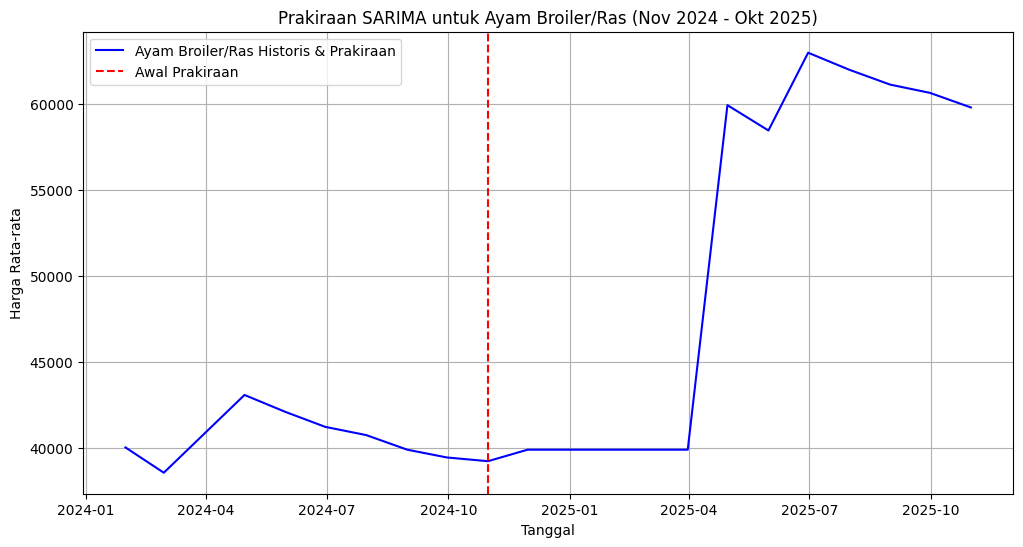

Kinerja untuk Ayam Broiler/Ras:
MAPE: 0.0143
RMSE: 570.9122
--------------------------------------------------
Memproses: Beras IR 42/Pera


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will

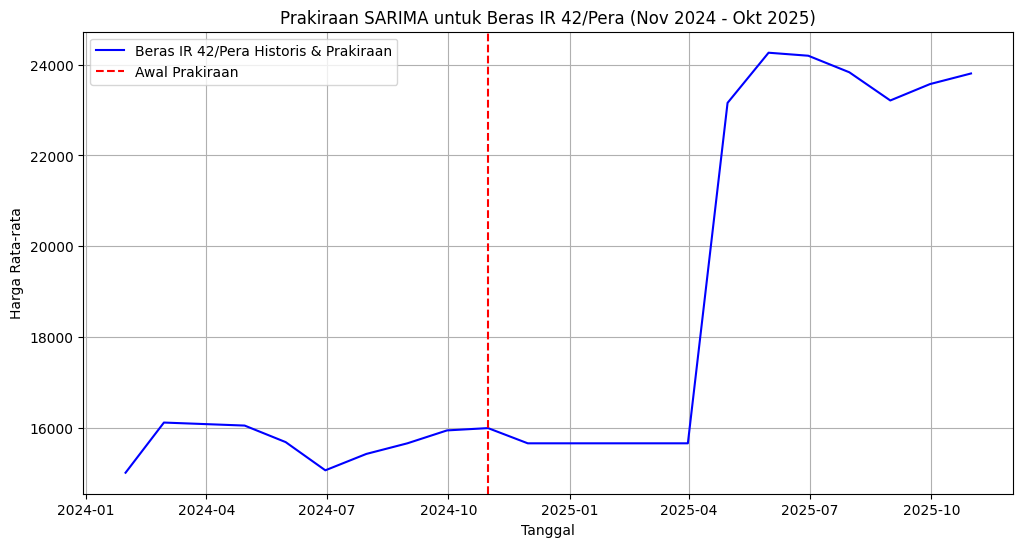

Kinerja untuk Beras IR 42/Pera:
MAPE: 0.0194
RMSE: 310.8232
--------------------------------------------------
Memproses: Cabe Merah Keriting


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-in

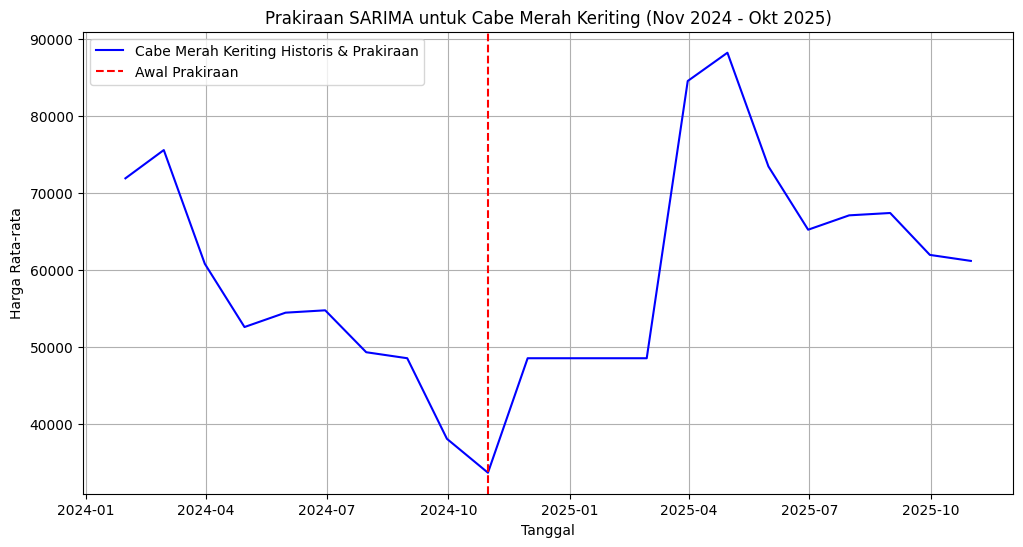

Kinerja untuk Cabe Merah Keriting:
MAPE: 0.3572
RMSE: 12836.0842
--------------------------------------------------
Memproses: Garam Dapur


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-in

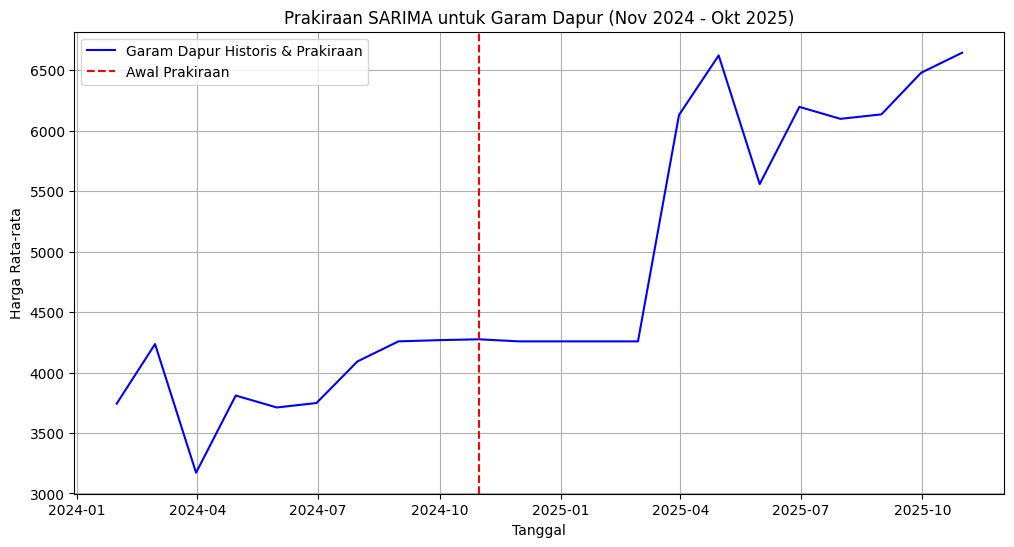

Kinerja untuk Garam Dapur:
MAPE: 0.0032
RMSE: 13.9463
--------------------------------------------------
Memproses: Gula Pasir


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-in

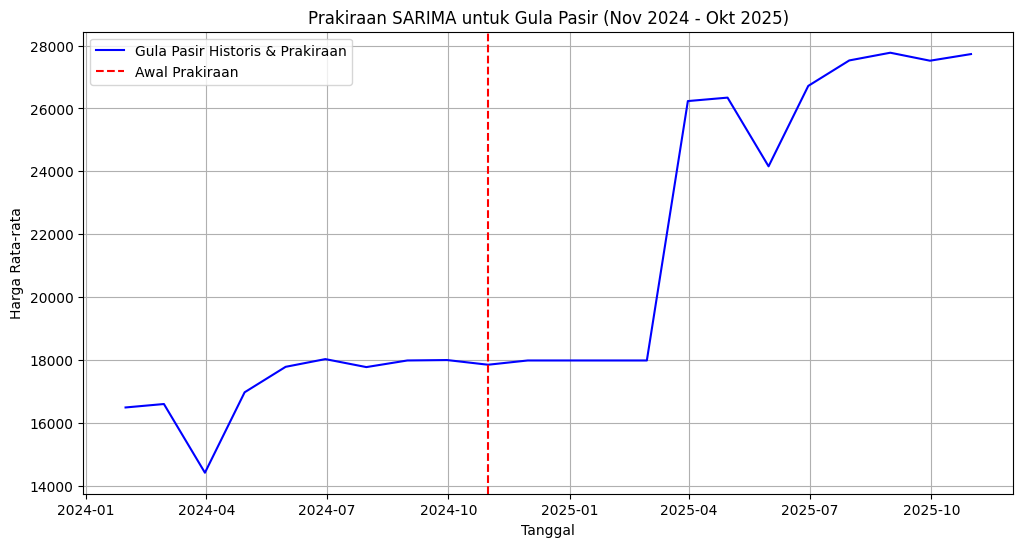

Kinerja untuk Gula Pasir:
MAPE: 0.0042
RMSE: 96.3507
--------------------------------------------------
Memproses: Telur Ayam Ras


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-in

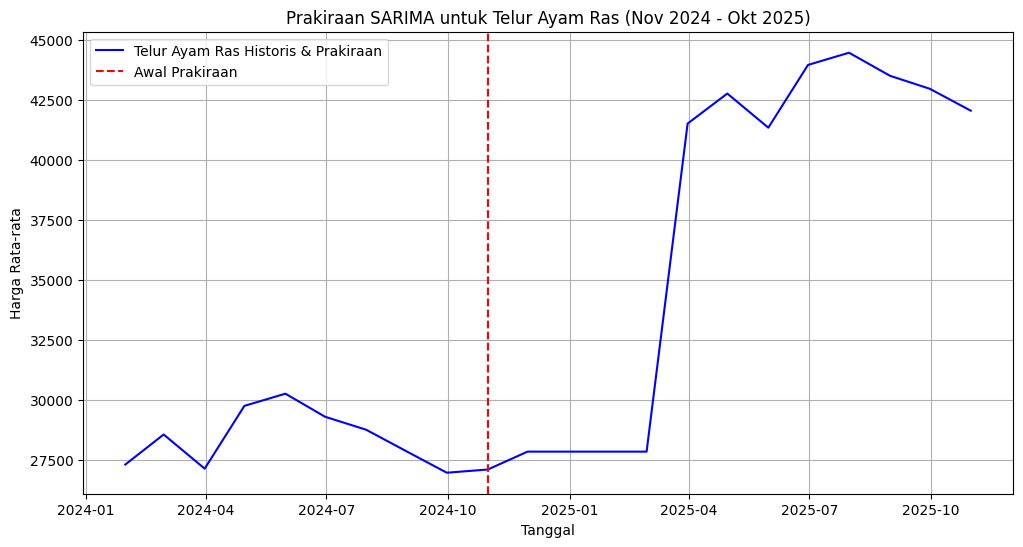

Kinerja untuk Telur Ayam Ras:
MAPE: 0.0300
RMSE: 813.7629
--------------------------------------------------
Memproses: Tepung Terigu


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-in

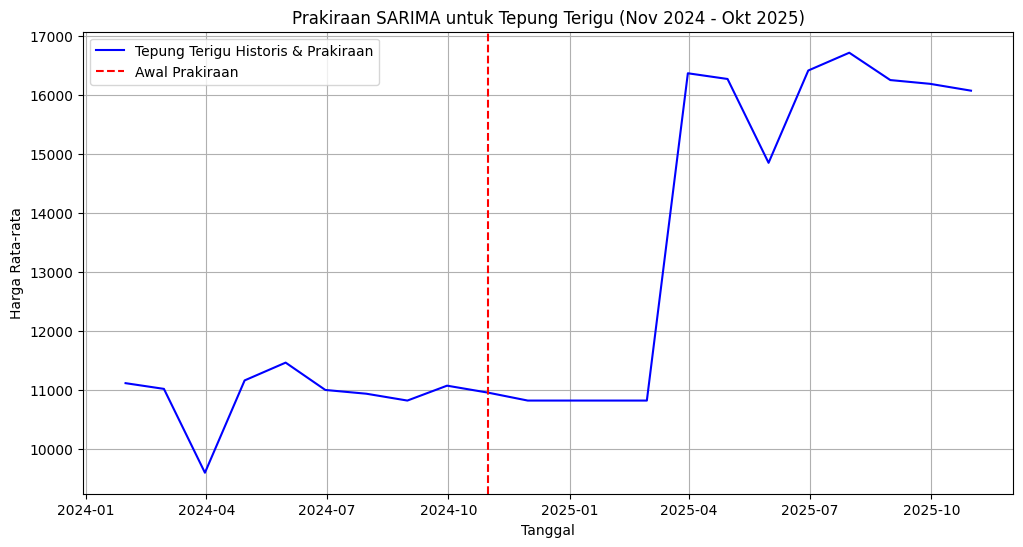

Kinerja untuk Tepung Terigu:
MAPE: 0.0176
RMSE: 202.4490
--------------------------------------------------


In [ ]:
# Mengelompokkan data berdasarkan 'Nama_Bahan_Pokok' dan 'Tanggal' (per bulan) untuk menghitung harga rata-rata
commodity_monthly = data.groupby(['Nama_Bahan_Pokok', pd.Grouper(key='Tanggal', freq='M')])['Harga_Rerata'].mean().reset_index()

# Menjadikan kolom 'Tanggal' sebagai indeks
commodity_monthly.set_index('Tanggal', inplace=True)

# Melakukan iterasi untuk setiap komoditas unik
for commodity in commodity_monthly['Nama_Bahan_Pokok'].unique():
    print(f'Memproses: {commodity}')

    # Menyaring data untuk komoditas saat ini
    commodity_data = commodity_monthly[commodity_monthly['Nama_Bahan_Pokok'] == commodity]

    # Menghapus kolom 'Nama_Bahan_Pokok' (tidak diperlukan untuk analisis)
    commodity_data = commodity_data.drop(columns=['Nama_Bahan_Pokok'])

    # Melakukan iterasi untuk setiap komoditas unik
for commodity in commodity_monthly['Nama_Bahan_Pokok'].unique():
    print(f'Memproses: {commodity}')

    # Menyaring data untuk komoditas saat ini
    commodity_data = commodity_monthly[commodity_monthly['Nama_Bahan_Pokok'] == commodity]

    # Menghapus kolom 'Nama_Bahan_Pokok' (tidak diperlukan untuk analisis deret waktu)
    commodity_data = commodity_data.drop(columns=['Nama_Bahan_Pokok'])

    # Membagi data menjadi data pelatihan (80%) dan pengujian
    train_size = int(len(commodity_data) * 0.8)
    train, test = commodity_data[:train_size], commodity_data[train_size:]

    # Mendefinisikan parameter model SARIMA (contoh parameter)
    order = (1, 1, 1)  # Parameter ARIMA
    seasonal_order = (1, 1, 1, 12)  # Parameter musiman SARIMA (musiman = 12 bulan)

    # Melatih model SARIMA
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    sarima_fit = model.fit(disp=False)

    # Membuat prakiraan untuk data uji
    test_forecast = sarima_fit.forecast(len(test))

    # Mengevaluasi kinerja model
    mape = mean_absolute_percentage_error(test, test_forecast)
    rmse = np.sqrt(mean_squared_error(test, test_forecast))

    # Prakiraan untuk 12 bulan ke depan (contoh: Nov 2024 - Okt 2025)
    future_forecast = sarima_fit.get_forecast(steps=12).predicted_mean

    # Menggabungkan data historis dan prakiraan untuk visualisasi
    forecast_dates = pd.date_range(start=commodity_data.index[-1] + pd.DateOffset(1),
                                   periods=12, freq='M')
    forecast_series = pd.Series(future_forecast.values, index=forecast_dates)
    combined_series = pd.concat([commodity_data['Harga_Rerata'], forecast_series])

    # Membuat plot data historis dan prakiraan
    plt.figure(figsize=(12, 6))
    plt.plot(combined_series, label=f'{commodity} Historis & Prakiraan', color='blue')
    plt.axvline(x=commodity_data.index[-1], color='red', linestyle='--', label='Awal Prakiraan')
    plt.title(f"Prakiraan SARIMA untuk {commodity} (Nov 2024 - Okt 2025)")
    plt.xlabel('Tanggal')
    plt.ylabel('Harga Rata-rata')
    plt.legend()
    plt.grid()
    plt.show()

    # Menampilkan metrik evaluasi
    print(f'Kinerja untuk {commodity}:')
    print(f'MAPE: {mape:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print('-' * 50)